This program creates

In [1]:
# Import system packages
import ipywidgets as widgets
import pandas as pd
import math
from matplotlib import pyplot as plt
import arcpy
%pprint
# Define dataframe
df = pd.read_excel(r"C:\Users\Abigail\Documents\Geocomputation\FinalProject\Flood Data.xlsx")

Pretty printing has been turned OFF


In [2]:
# Get user flood inputs
print("Compare a flood to your dataset")
location = input("Location: ")
maxwateri = input("Max Water Level: ")
fstagei = input("Flood stage: ")

Compare a flood to your dataset
Location: Houston
Max Water Level: 60
Flood stage: 50


In [3]:
# Calculate heights above flood stage for user inputs and for the dataframe
# Get values of user inputs and make lists for columns in dataframe
maxwater = float(maxwateri)
fstage = float(fstagei)
hafs = maxwater - fstage
locationcol = df["Location"]
locationlist = locationcol.tolist()
locationlist.append(location)
maxwatercol = df["Max Water Level (ft)"]
fstagecol = df["Flood Stage (ft)"]
maxwaterlist = maxwatercol.tolist()
fstagelist = fstagecol.tolist()
# Calculate list of HAFS values for bar chart heights
hafslist = []
ziphafsl = zip(maxwaterlist, fstagelist)
for maxwaterlist_i, fstagelist_i in ziphafsl:
    hafslist.append(maxwaterlist_i-fstagelist_i)
hafslist = [round(h, 2) for h in hafslist]
hafslist.append(hafs)
# Calculate separate list of HAFS values only for dataframe
hafscol = []
ziphafsc = zip(maxwaterlist, fstagelist)
for maxwaterlist_i, fstagelist_i in ziphafsc:
    hafscol.append(maxwaterlist_i-fstagelist_i)
hafscol = [round(h, 2) for h in hafscol]

['Magnolia', 'Denham Springs', 'Port Vincent', 'Olive Branch Ln.', 'Comite Joor Rd.', 'Amite', 'Robert', 'Liverpool', 'Holden', 'Baptist', 'Houston']
[10.36, 17.2, 9.45, 7.96, 14.22, 5.28, 12.33, 4.76, 7.16, 6.2, 10.0]
[10.36, 17.2, 9.45, 7.96, 14.22, 5.28, 12.33, 4.76, 7.16, 6.2]


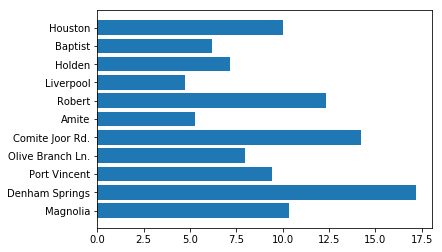

In [12]:
# Graph to compare height above flood stage from inputs to heights above flood stage from dataframe
bargraph = plt.barh(locationlist, hafslist)

In [6]:
# Calculate index values from new HAFS column of dataframe
df["Height Above Flood Stage (ft)"] = hafscol
hafscol = df["Height Above Flood Stage (ft)"]
meanHAFS = hafscol.mean()
countHAFS = hafscol.count()
HAFSlist = hafscol.tolist()
sqtotal = 0
for h in HAFSlist:
    sq = (h - meanHAFS)**2
    sqtotal += sq
stdevHAFS = math.sqrt((sqtotal)/(countHAFS - 1))
HAFSindex = []
for h in HAFSlist:
    zscoreHAFS = (h - meanHAFS)/stdevHAFS 
    indexHAFS = round((50+(20*zscoreHAFS))*2, 2)
    HAFSindex.append(indexHAFS)
df["HAFS Index"] = HAFSindex
display(df)

,River,Location,Max Water Level (ft),Flood Stage (ft),Height Above Flood Stage (ft),HAFS Index
0,Amite,Magnolia,58.36,48,10.36,108.52
1,Amite,Denham Springs,46.20,29,17.20,175.69
2,Amite,Port Vincent,17.45,8,9.45,99.59
3,Comite,Olive Branch Ln.,26.96,19,7.96,84.96
4,Comite,Comite Joor Rd.,34.22,20,14.22,146.43
5,Tangipahoa,Amite,26.28,21,5.28,58.64
6,Tangipahoa,Robert,27.33,15,12.33,127.87
7,Tickfaw,Liverpool,13.76,9,4.76,53.53
8,Tickfaw,Holden,22.16,15,7.16,77.10
9,Natalbany,Baptist,22.20,16,6.20,67.67


In [16]:
# Calculate comparative index value from HAFS value of user inputs
def indexHAFS(HAFS):
    zscore = (HAFS - meanHAFS)/stdevHAFS
    index = (50+(20*zscore))*2
    return index
print("Compared to this flood event, your", location, "flood would have an HAFS index of", round(indexHAFS(hafs), 2))

Compared to this flood event, your Houston flood would have an HAFS index of 104.99


In [ ]:
# Use geoprocessing to create feature class of rivers selected by state
arcpy.env.workspace = r"C:\Users\Abigail\Documents\Geocomputation\FinalProject"
USrivers = "USA_Rivers_and_Streams.shp"
where_clause = "State = 'LA'"
selectedrivers = arcpy.SelectLayerByAttribute_management(USrivers, "NEW_SELECTION",
                                                   where_clause)
LArivers = arcpy.CopyFeatures_management(selectedrivers, "LArivers")
# Get the city boundary polygons shapefile
LAcities = "tl_2019_22_place.shp"

In [ ]:
# Script a map of index values